<a href="https://colab.research.google.com/github/MyDearGreatTeacher/TF/blob/master/TF_NN_MBGDandSGD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###教科書

TensorFlow Machine Learning Cookbook

Nick McClure February 2017

https://github.com/nfmcclure/tensorflow_cookbook

02_TensorFlow_Way/06_Working_with_Batch_and_Stochastic_Training/06_batch_stochastic_training.py

# Stochastic  Gradient Descent

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.python.framework import ops
ops.reset_default_graph()


# Create graph
sess = tf.Session()

# Create data
x_vals = np.random.normal(1, 0.1, 100)
y_vals = np.repeat(10., 100)
x_data = tf.placeholder(shape=[1], dtype=tf.float32)
y_target = tf.placeholder(shape=[1], dtype=tf.float32)

# Create variable (one model parameter = A)
A = tf.Variable(tf.random_normal(shape=[1]))

# Add operation to graph
my_output = tf.multiply(x_data, A)

# Add L2 loss operation to graph
loss = tf.square(my_output - y_target)

# Create Optimizer
my_opt = tf.train.GradientDescentOptimizer(0.02)
train_step = my_opt.minimize(loss)

# Initialize variables
init = tf.global_variables_initializer()
sess.run(init)

loss_stochastic = []
# Run Loop
for i in range(100):
    rand_index = np.random.choice(100)
    rand_x = [x_vals[rand_index]]
    rand_y = [y_vals[rand_index]]
    sess.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})
    
    if (i+1)%5==0:
        print('Step #' + str(i+1) + ' A = ' + str(sess.run(A)))
        temp_loss = sess.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})
        print('Loss = ' + str(temp_loss))
        loss_stochastic.append(temp_loss)

Step #5 A = [0.5533335]
Loss = [88.01711]
Step #10 A = [2.3527794]
Loss = [52.81366]
Step #15 A = [3.7738936]
Loss = [40.001495]
Step #20 A = [4.921602]
Loss = [26.823112]
Step #25 A = [5.8310432]
Loss = [12.082465]
Step #30 A = [6.570419]
Loss = [5.6103063]
Step #35 A = [7.1439466]
Loss = [2.4210463]
Step #40 A = [7.6305146]
Loss = [11.829408]
Step #45 A = [7.9922814]
Loss = [0.293053]
Step #50 A = [8.408428]
Loss = [3.7821705]
Step #55 A = [8.545987]
Loss = [0.8405337]
Step #60 A = [8.701541]
Loss = [0.98514205]
Step #65 A = [8.930631]
Loss = [0.6874837]
Step #70 A = [8.943389]
Loss = [0.15637438]
Step #75 A = [9.120171]
Loss = [0.35149568]
Step #80 A = [9.288064]
Loss = [0.756339]
Step #85 A = [9.3459015]
Loss = [0.06552455]
Step #90 A = [9.321806]
Loss = [0.09580485]
Step #95 A = [9.539761]
Loss = [4.33246]
Step #100 A = [9.698527]
Loss = [0.39509135]


# Mini-Batch  Gradient Descent

Step #5 A = [[2.1740866]]
Loss = 59.732616
Step #10 A = [[3.6381633]]
Loss = 38.3041
Step #15 A = [[4.8085876]]
Loss = 25.195902
Step #20 A = [[5.754075]]
Loss = 17.47294
Step #25 A = [[6.5167317]]
Loss = 10.631655
Step #30 A = [[7.137004]]
Loss = 7.95197
Step #35 A = [[7.642663]]
Loss = 4.8885064
Step #40 A = [[8.04364]]
Loss = 3.6863716
Step #45 A = [[8.377675]]
Loss = 3.146131
Step #50 A = [[8.6266775]]
Loss = 2.1141105
Step #55 A = [[8.82769]]
Loss = 2.0875711
Step #60 A = [[8.984908]]
Loss = 1.5612785
Step #65 A = [[9.13702]]
Loss = 1.0676601
Step #70 A = [[9.254236]]
Loss = 1.1873903
Step #75 A = [[9.335363]]
Loss = 1.5366862
Step #80 A = [[9.381905]]
Loss = 0.7644475
Step #85 A = [[9.447761]]
Loss = 0.94966996
Step #90 A = [[9.493336]]
Loss = 0.98318326
Step #95 A = [[9.530296]]
Loss = 1.6633517
Step #100 A = [[9.570239]]
Loss = 1.036273


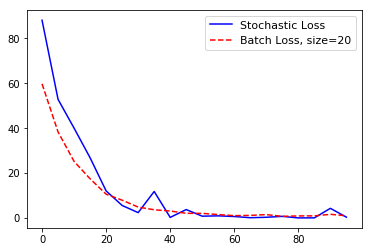

In [0]:
# Re-initialize graph
ops.reset_default_graph()
sess = tf.Session()

# Declare batch size
batch_size = 20

# Create data
x_vals = np.random.normal(1, 0.1, 100)
y_vals = np.repeat(10., 100)
x_data = tf.placeholder(shape=[None, 1], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)

# Create variable (one model parameter = A)
A = tf.Variable(tf.random_normal(shape=[1,1]))

# Add operation to graph
my_output = tf.matmul(x_data, A)

# Add L2 loss operation to graph
loss = tf.reduce_mean(tf.square(my_output - y_target))

# Create Optimizer
my_opt = tf.train.GradientDescentOptimizer(0.02)
train_step = my_opt.minimize(loss)

# Initialize variables
init = tf.global_variables_initializer()
sess.run(init)

loss_batch = []
# Run Loop
for i in range(100):
    rand_index = np.random.choice(100, size=batch_size)
    rand_x = np.transpose([x_vals[rand_index]])
    rand_y = np.transpose([y_vals[rand_index]])
    sess.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})
    if (i+1)%5==0:
        print('Step #' + str(i+1) + ' A = ' + str(sess.run(A)))
        temp_loss = sess.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})
        print('Loss = ' + str(temp_loss))
        loss_batch.append(temp_loss)
        
plt.plot(range(0, 100, 5), loss_stochastic, 'b-', label='Stochastic Loss')
plt.plot(range(0, 100, 5), loss_batch, 'r--', label='Batch Loss, size=20')
plt.legend(loc='upper right', prop={'size': 11})
plt.show()